<a href="https://colab.research.google.com/github/mahimathakkar/X-ray-diffraction-patterns-for-line-profile-analysis/blob/main/XRD_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [220]:
xrd_si_data=pd.read_csv('/content/drive/Shareddrives/nmeshram@mt.iitr.ac.in/XRD_silicon_std_data.csv')
xrd_si_data.head()

,Angle,Intensity
0,30.00,190.0000
1,30.02,216.6667
2,30.04,156.0000
3,30.06,201.3333
4,30.08,227.6067


In [221]:
xrd_test_data=pd.read_csv('/content/drive/Shareddrives/nmeshram@mt.iitr.ac.in/XRD_test_data.csv')

In [222]:
#Visualize both data sets..
xrd_si_data.head()


,Angle,Intensity
0,30.00,190.0000
1,30.02,216.6667
2,30.04,156.0000
3,30.06,201.3333
4,30.08,227.6067


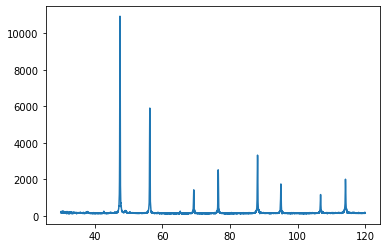

In [223]:
#Plot intensity vs angle for Si standard data
plt.plot('Angle', 'Intensity', data=xrd_si_data)

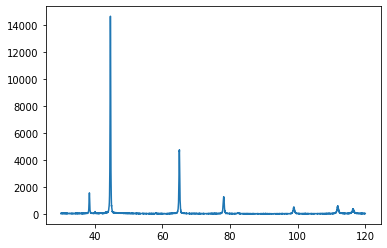

In [224]:
#Plot intensity vs angle for test data
plt.plot('Angle', 'Intensity', data=xrd_test_data)

In [225]:
#Identifying peaks in given datasets


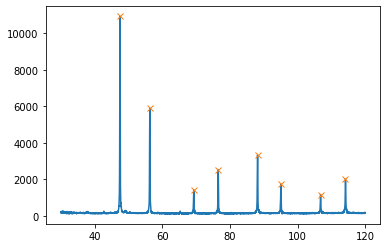

In [226]:
#Peaks in Si standard data
from scipy.signal import argrelextrema
from scipy.signal import find_peaks
x_si = np.array(xrd_si_data['Angle'])
y_si = np.array(xrd_si_data['Intensity'])
peaks_si, _ = find_peaks(y_si,prominence=200)
peak_data_si=pd.DataFrame(columns=['Angle_of_peak','Intensity_of_peak'])
peak_data_si['Angle_of_peak']=np.array(x_si[peaks_si])
peak_data_si['Intensity_of_peak']=np.array(y_si[peaks_si])
# this way the x-axis corresponds to the index of x
plt.plot(x_si, y_si)
plt.plot(x_si[peaks_si], y_si[peaks_si], "x")
plt.show()

##plot in intensity in log scale as well

In [227]:
print(peak_data_si)


   Angle_of_peak  Intensity_of_peak
0          47.50          10942.010
1          56.32           5906.137
2          69.32           1423.979
3          76.54           2520.595
4          88.18           3326.683
5          95.08           1746.806
6         106.82           1166.121
7         114.18           2005.780


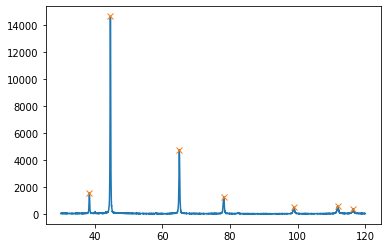

In [228]:
#Peaks in test data
x_test = np.array(xrd_test_data['Angle'])
y_test = np.array(xrd_test_data['Intensity'])
peaks_test, _ = find_peaks(y_test,prominence=200)
peak_data_test=pd.DataFrame(columns=['Angle_of_peak','Intensity_of_peak'])
peak_data_test['Angle_of_peak']=np.array(x_test[peaks_test])
peak_data_test['Intensity_of_peak']=np.array(y_test[peaks_test])
plt.plot(x_test, y_test)
plt.plot(x_test[peaks_test], y_test[peaks_test], "x")
plt.show()

In [229]:
print(peak_data_test)

   Angle_of_peak  Intensity_of_peak
0          38.42          1576.8450
1          44.64         14650.8500
2          65.04          4764.8990
3          78.14          1295.5660
4          98.90           526.2841
5         111.86           613.9078
6         116.34           375.0093


In [230]:
#Convert 2 * theta to theta

peak_data_si['Angle_of_peak']=peak_data_si['Angle_of_peak']/2
peak_data_test['Angle_of_peak']=peak_data_test['Angle_of_peak']/2

In [231]:
#FWHMs of all peaks
#for si data
from scipy.signal import peak_widths
x_si_indices=[]
for peak in peak_data_si['Angle_of_peak']:
  for i in range(len(x_si)):
    if peak==x_si[i]/2:
      x_si_indices.append(i)
      break
no_of_indices_si=len(x_si)
factor_indices_to_degree=60/no_of_indices_si
fwhm_si_peaks=pd.DataFrame()
fwhm_si_peaks=peak_data_si
tmp=peak_widths(y_si,x_si_indices , rel_height=0.5)

fwhm_si_peaks['fwhm']=tmp[0]*factor_indices_to_degree
print(fwhm_si_peaks)

   Angle_of_peak  Intensity_of_peak      fwhm
0          23.75          10942.010  0.104771
1          28.16           5906.137  0.103359
2          34.66           1423.979  0.107627
3          38.27           2520.595  0.108865
4          44.09           3326.683  0.116304
5          47.54           1746.806  0.112221
6          53.41           1166.121  0.122142
7          57.09           2005.780  0.129126


In [232]:
#for test data
import math
x_test_indices=[]
for peak in peak_data_test['Angle_of_peak']:
  for i in range(len(x_test)):
    if peak==x_test[i]/2:
      x_test_indices.append(i)
      break
no_of_indices_test=len(x_test)
factor_indices_to_degree_test=60/no_of_indices_test
fwhm_test_peaks=pd.DataFrame()
fwhm_test_peaks=peak_data_test
tmp=peak_widths(y_test,x_test_indices , rel_height=0.5)
fwhm_test_peaks['fwhm']=tmp[0]*factor_indices_to_degree_test
print(fwhm_test_peaks)

   Angle_of_peak  Intensity_of_peak      fwhm
0          19.21          1576.8450  0.141936
1          22.32         14650.8500  0.141137
2          32.52          4764.8990  0.178519
3          39.07          1295.5660  0.227316
4          49.45           526.2841  0.327136
5          55.93           613.9078  0.325303
6          58.17           375.0093  0.381005


In [233]:
#Plot Williamson-Hall Plot

In [234]:
#for Si data
"""fwhm_si_peaks['fwhm']=fwhm_si_peaks['fwhm']-0.15
for i in range(len(fwhm_si_peaks['fwhm'])):
  fwhm_si_peaks.iloc[i,2]=(fwhm_si_peaks.iloc[i,2])*3.14/180
wh_data_si=pd.DataFrame()
import math
wh_x_si=[]
for i in range(len(fwhm_si_peaks['fwhm'])):
  wh_x_si.append(math.sin(math.radians(fwhm_si_peaks.iloc[i,0])))
wh_y_si=[]
for i in range(len(fwhm_si_peaks['fwhm'])):
  print(fwhm_si_peaks.iloc[i,0])
  wh_y_si.append(math.cos(math.radians(fwhm_si_peaks.iloc[i,0]))*fwhm_si_peaks.iloc[i,2])
wh_data_si['x']=wh_x_si
wh_data_si['y']=wh_y_si
print(wh_data_si)
m, b = np.polyfit(wh_x_si, wh_y_si, 1)
plt.plot(wh_x_si, wh_y_si, 'o')
wh_y_si_pred=[]
for i in range(len(wh_x_si)):
  wh_y_si_pred.append(m*wh_x_si[i]+b)
plt.plot(wh_x_si,wh_y_si_pred)
"""

"fwhm_si_peaks['fwhm']=fwhm_si_peaks['fwhm']-0.15\nfor i in range(len(fwhm_si_peaks['fwhm'])):\n  fwhm_si_peaks.iloc[i,2]=(fwhm_si_peaks.iloc[i,2])*3.14/180\nwh_data_si=pd.DataFrame()\nimport math\nwh_x_si=[]\nfor i in range(len(fwhm_si_peaks['fwhm'])):\n  wh_x_si.append(math.sin(math.radians(fwhm_si_peaks.iloc[i,0])))\nwh_y_si=[]\nfor i in range(len(fwhm_si_peaks['fwhm'])):\n  print(fwhm_si_peaks.iloc[i,0])\n  wh_y_si.append(math.cos(math.radians(fwhm_si_peaks.iloc[i,0]))*fwhm_si_peaks.iloc[i,2])\nwh_data_si['x']=wh_x_si\nwh_data_si['y']=wh_y_si\nprint(wh_data_si)\nm, b = np.polyfit(wh_x_si, wh_y_si, 1)\nplt.plot(wh_x_si, wh_y_si, 'o')\nwh_y_si_pred=[]\nfor i in range(len(wh_x_si)):\n  wh_y_si_pred.append(m*wh_x_si[i]+b)\nplt.plot(wh_x_si,wh_y_si_pred)\n"

          x         y
0  0.329031  0.000612
1  0.379779  0.000587
2  0.537594  0.001043
3  0.630269  0.001604
4  0.759839  0.002437
5  0.828354  0.001917
6  0.849617  0.002317
r squared: 0.9012139584403163


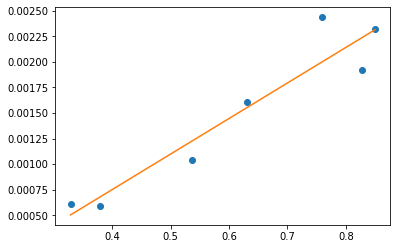

In [235]:
#Plot Williamson Hall plot for sample data

#function to find closest peak in Si standard corresponding to sample peak

def find_closest(lst, K):   
  val=1000
  ans=0
  for i in range(len(lst)):
    if val>abs(lst[i]-K):
      val=abs(lst[i]-K)
      ans=lst[i]
  return ans

import scipy

for i in range(len(fwhm_test_peaks['fwhm'])):
  instr_broadening=fwhm_si_peaks.loc[fwhm_si_peaks['Angle_of_peak']==find_closest(fwhm_si_peaks['Angle_of_peak'],fwhm_test_peaks.iloc[i,0]),'fwhm']
  #print(instr_broadening)
  instr_broadening=np.array(instr_broadening)
  fwhm_test_peaks.iloc[i,2]=fwhm_test_peaks.iloc[i,2]-instr_broadening[0]
  #print(fwhm_test_peaks.iloc[i,2])

for i in range(len(fwhm_test_peaks['fwhm'])):
  fwhm_test_peaks.iloc[i,2]=(fwhm_test_peaks.iloc[i,2])*3.14/180
wh_data_test=pd.DataFrame()
import math
wh_x_test=[]
for i in range(len(fwhm_test_peaks['fwhm'])):
  wh_x_test.append(math.sin(math.radians(fwhm_test_peaks.iloc[i,0])))
wh_y_test=[]
for i in range(len(fwhm_test_peaks['fwhm'])):
  #print(fwhm_test_peaks.iloc[i,0])
  wh_y_test.append(math.cos(math.radians(fwhm_test_peaks.iloc[i,0]))*fwhm_test_peaks.iloc[i,2])
wh_data_test['x']=wh_x_test
wh_data_test['y']=wh_y_test

m, b, r_value, p_value, std_err = scipy.stats.linregress(wh_x_test, wh_y_test) 
print(wh_data_test)
print("r squared:",r_value**2)
plt.plot(wh_x_test, wh_y_test, 'o')
wh_y_test_pred=[]
for i in range(len(wh_x_test)):
  wh_y_test_pred.append(m*wh_x_test[i]+b)
plt.plot(wh_x_test,wh_y_test_pred)

In [243]:
#compute T
print(b)
T=0.9*0.15/b
T=abs(T)
print(T)

-0.0006433611833450328
209.83547577131318


In [241]:
#compute strain
print(m)
E=m/4
print("strain:", m/4)

0.003481616196287071
strain: 0.0008704040490717678


In [246]:
#compute dislocation density
p=(2/3 * E )/ (T * 0.286)
print("dislocation density in square_metre:" , p* 10**18)

dislocation density in square_metre: 9669069826454.64
